# Project -- RED WINE

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
df.tail(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1584,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,7
1585,7.2,0.390,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5,6
1586,7.5,0.310,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,6
1587,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6
1588,7.2,0.660,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,6
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6


# EDA (Exploratory Data Analysis)

In [5]:
df.shape

(1599, 12)

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: >

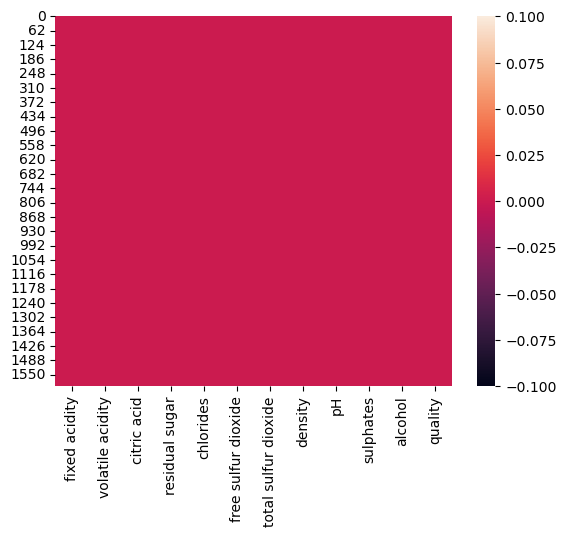

In [12]:
sns.heatmap(df.isnull())

As we can see there is no null values are present in the Dataset

In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


I had used the describe method to view the Count,mean,std. and inter quartiles 

we can see that there is a huge gap between 75% and max columns of residual sugar
we can see that there is a huge gap between 75% and max columns of free sulfur dioxide
we can see that there is a huge gap between 75% and max columns of total sulfur dioxide

so its mean there are some outliers we have to detect it 


In [14]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

# Visualization

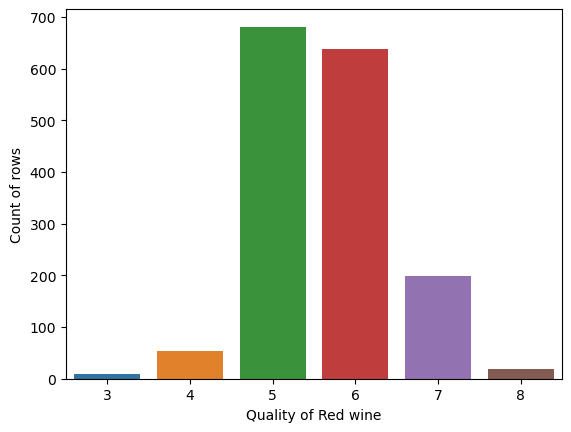

In [15]:
sns.countplot(x='quality',data=df)
plt.xlabel("Quality of Red wine")
plt.ylabel("Count of rows")
plt.show()

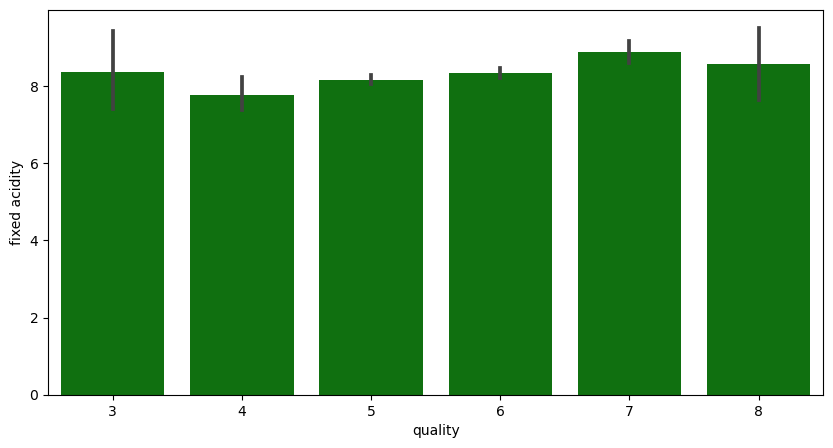

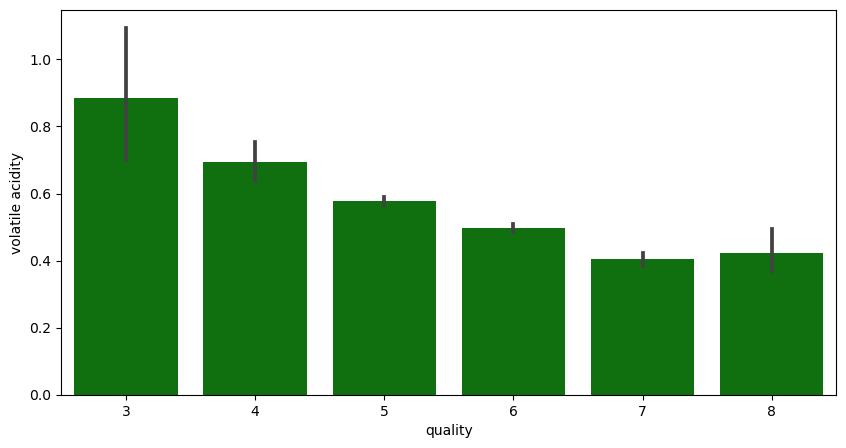

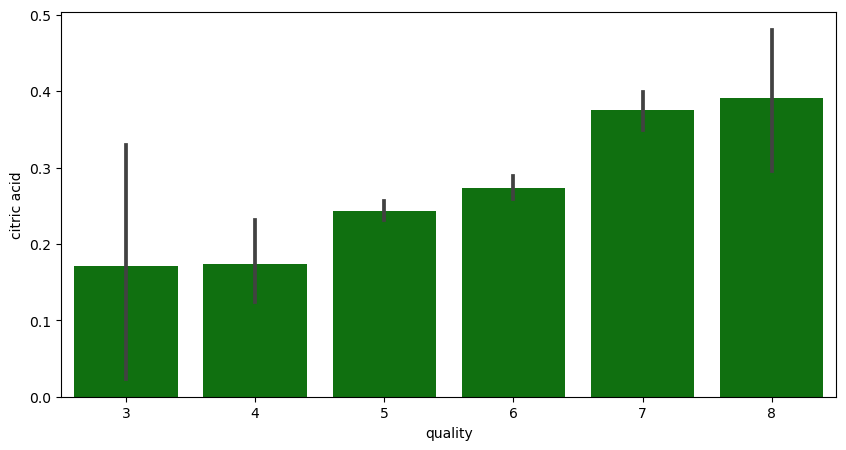

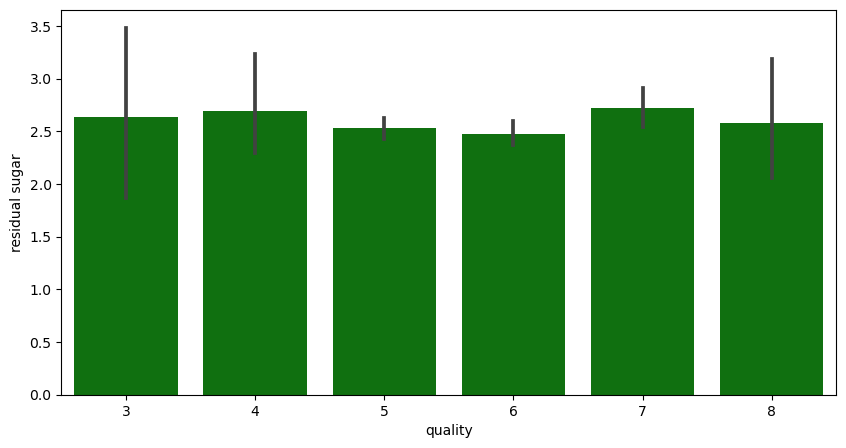

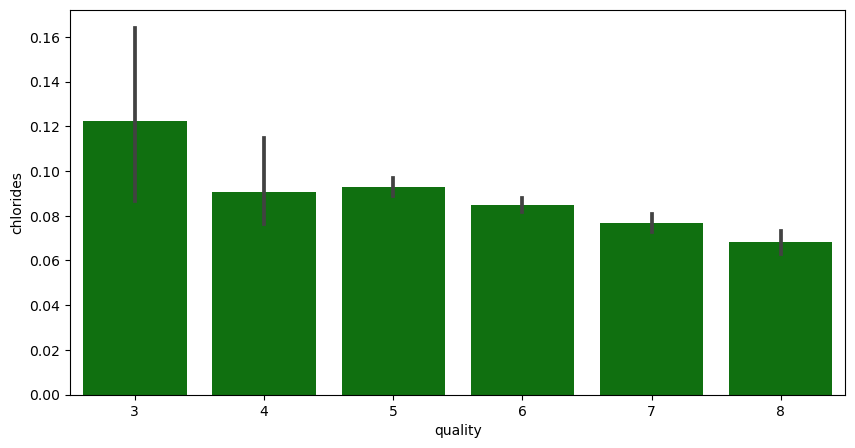

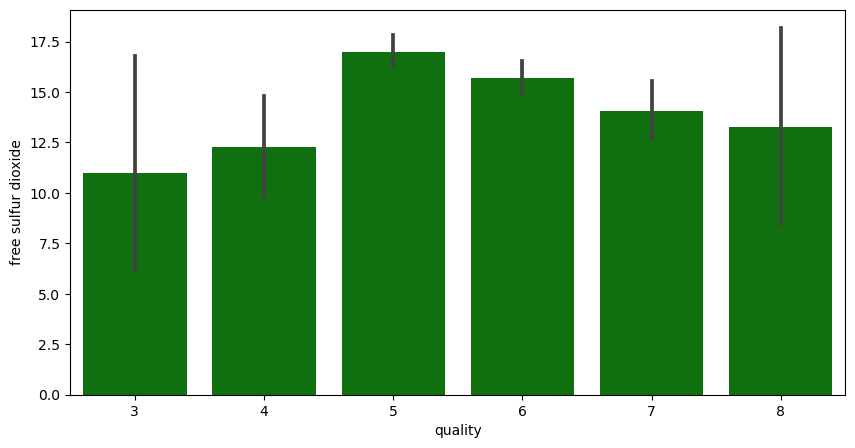

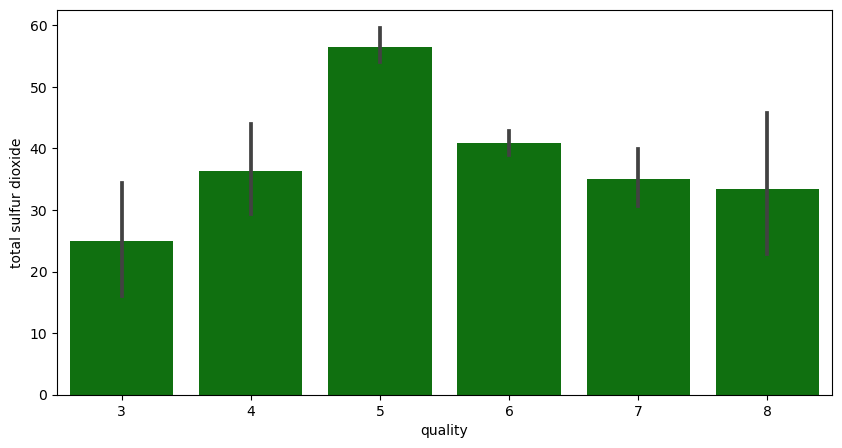

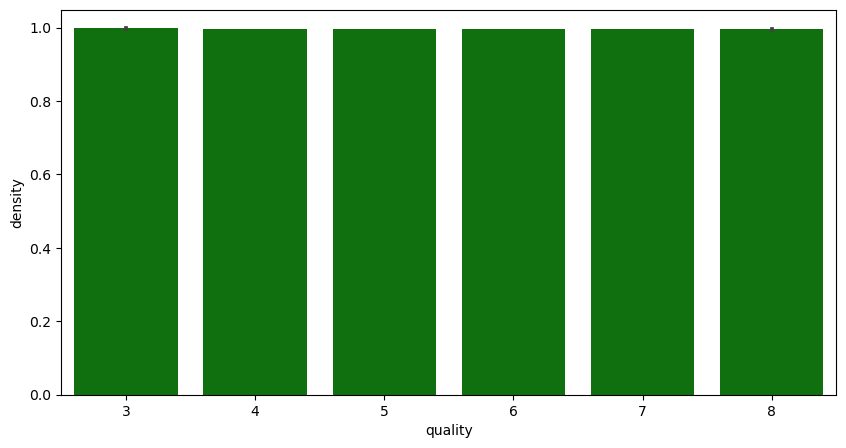

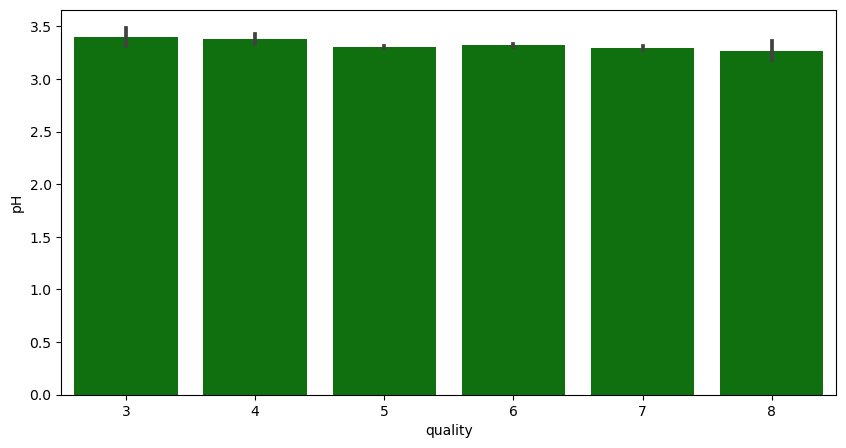

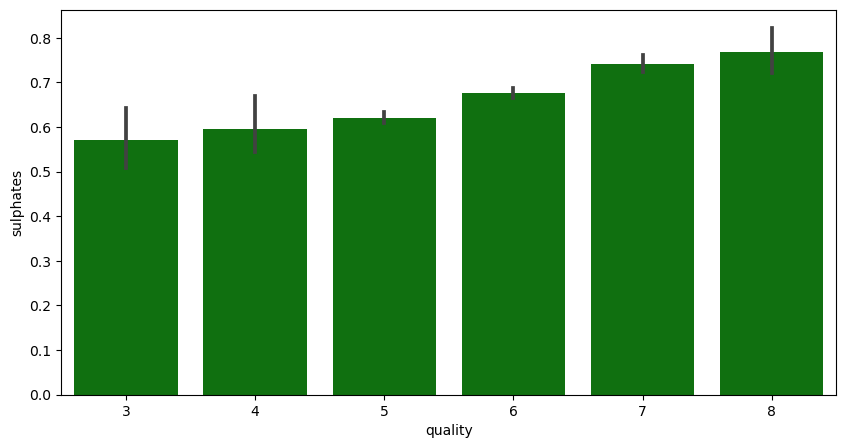

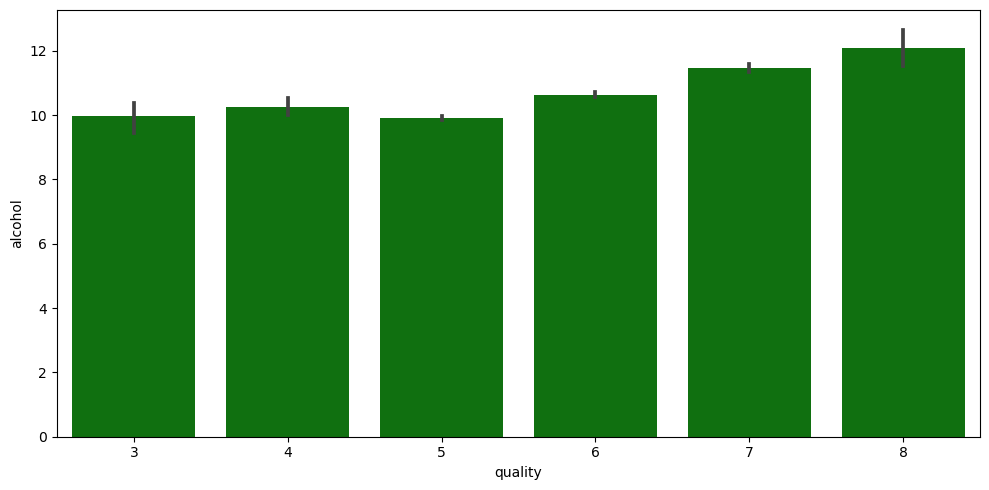

In [16]:
index=0
labels = df['quality']
features = df.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data=df, color="green")
plt.tight_layout()
plt.show()

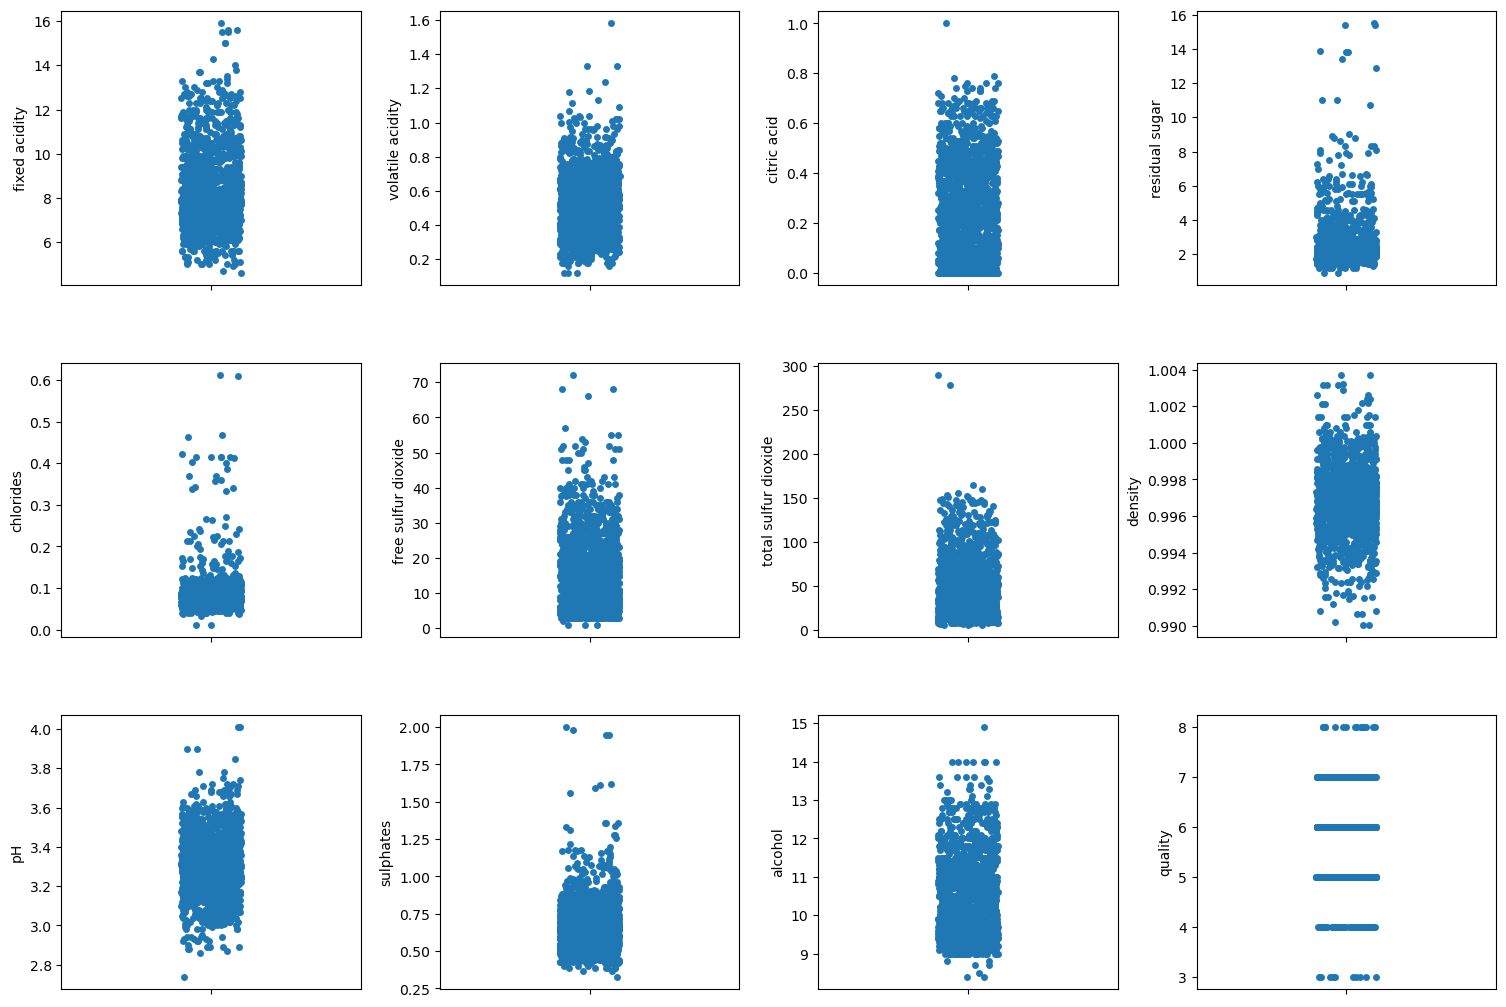

In [76]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.stripplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

With the help of the above stripplot we are able to see the whisker details and outliers clearly.

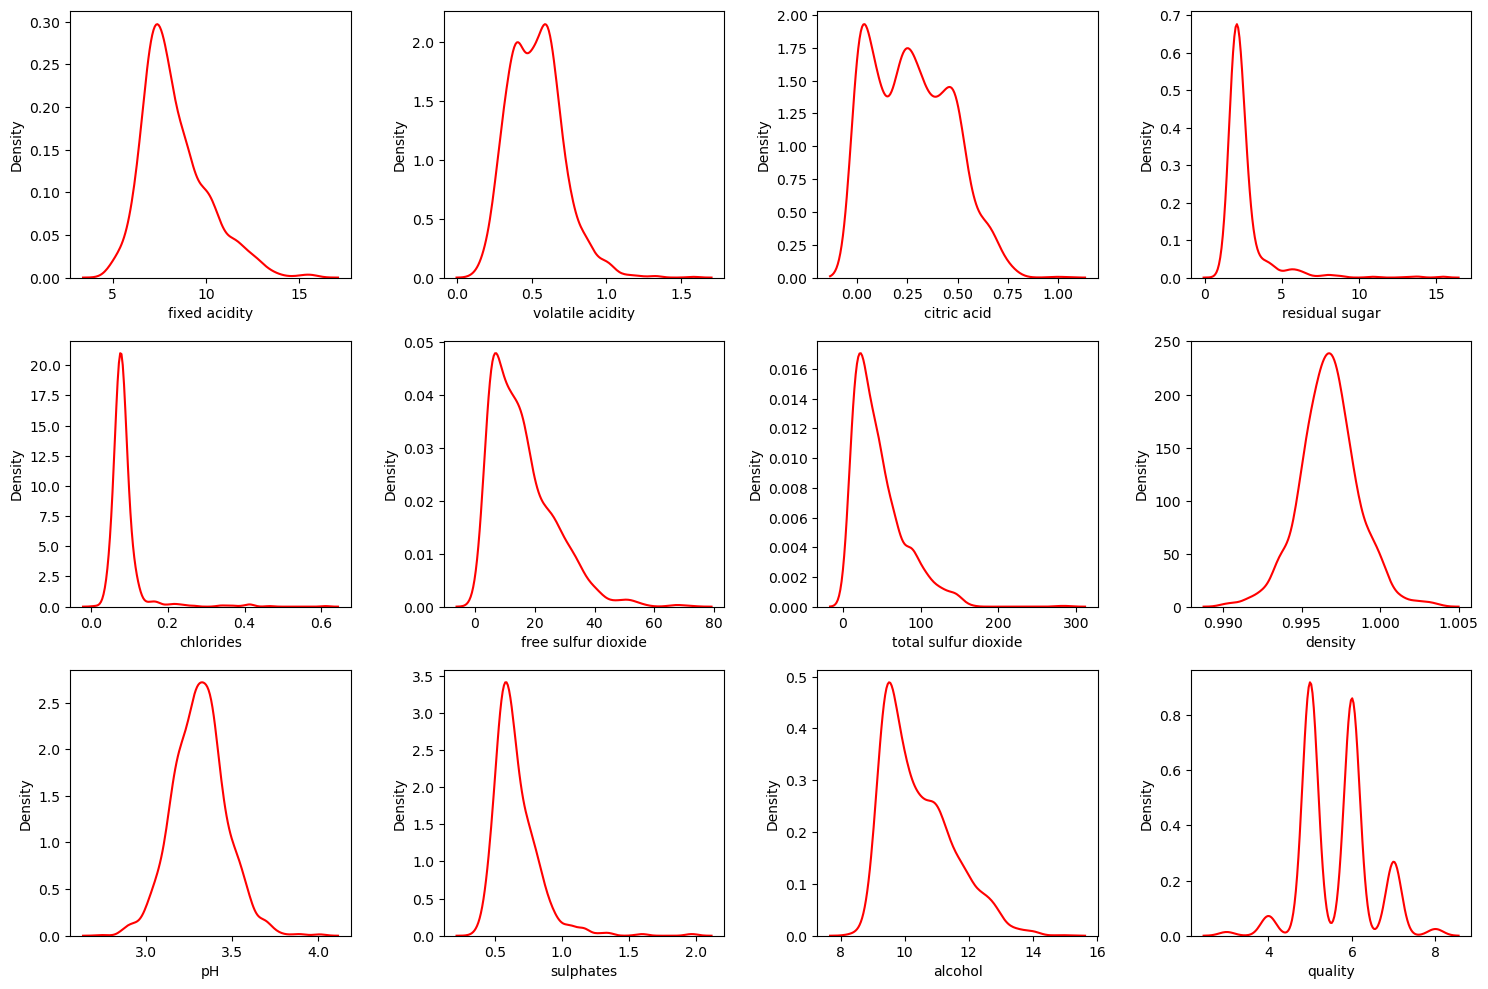

In [78]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], color="r",hist=False)
    index += 1
plt.tight_layout()
plt.show()

The distribution plots show that few of the columns are in normal distribution category showing a proper bell shape curve. However, we do see skewness in most of the feature columns 

# Correlation using a Heatmap

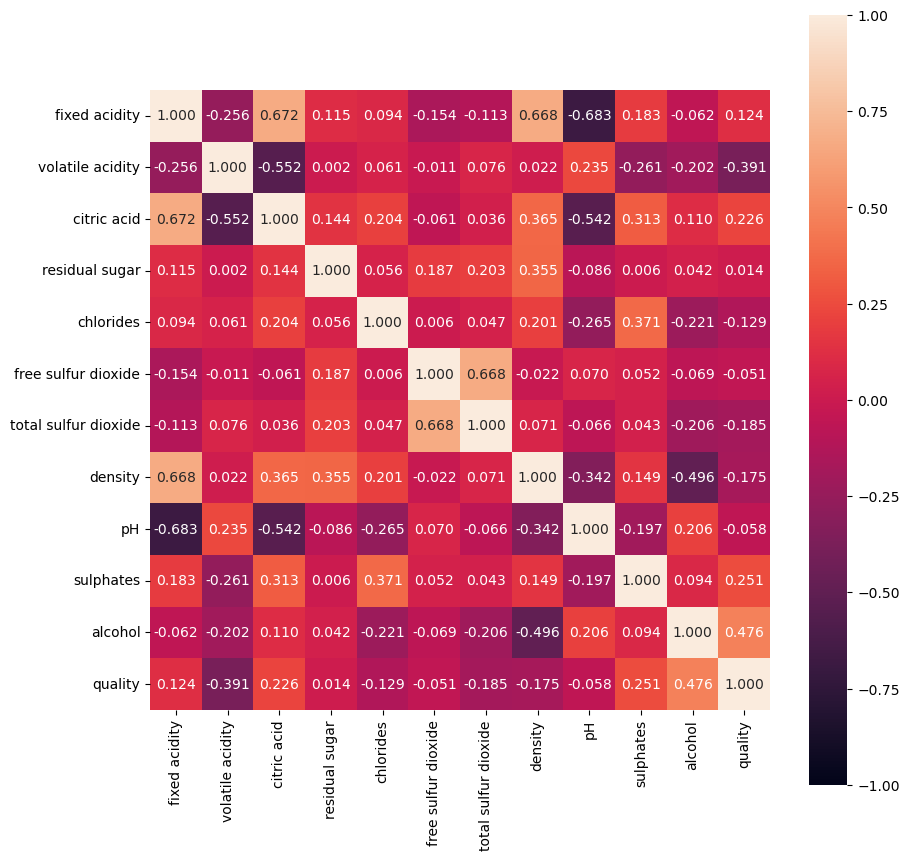

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10})
plt.show()

I see that the above heatmap shows the correlation matrix data wherein there are positive as well as negative correlations between the target label and other feture columns. A zero correlation indicates that there is no relationship between the variables. 

# Dropping a Column

In [21]:
df1 = df.drop('free sulfur dioxide',axis=1)
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


# Removing the Outliers

In [22]:
df1.shape

(1599, 11)

In [23]:
z=np.abs(zscore(df1))
threshold=3
np.where(z>3)

df2=df1[(z<3).all(axis=1)]
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [24]:
df2.shape

(1464, 11)

In [25]:
# checking the data loss percentage 

loss = (1599-1464)/1599*100
loss

8.442776735459661

After removing the outliers we are checking the data loss percentage 

# Now i am going to split the into 2 variables named as X and Y

In [26]:
X = df2.drop('quality', axis=1)
Y = df2['quality']

In [27]:
Y.value_counts()

5    624
6    590
7    187
4     47
8     16
Name: quality, dtype: int64

In [28]:
X, Y  = SMOTE().fit_resample(X, Y)

In [29]:
Y.value_counts()

5    624
6    624
7    624
4    624
8    624
Name: quality, dtype: int64

In [30]:
Y

0       5
1       5
2       5
3       6
4       5
       ..
3115    8
3116    8
3117    8
3118    8
3119    8
Name: quality, Length: 3120, dtype: int64

In [31]:
Y1 = Y.apply(lambda y_value:1 if y_value>=7 else 0) # 1 is for good quality and 0 for bad (not good) quality
Y1

0       0
1       0
2       0
3       0
4       0
       ..
3115    1
3116    1
3117    1
3118    1
3119    1
Name: quality, Length: 3120, dtype: int64

In [32]:
Y1.sample(20)

1414    0
2084    1
1097    1
157     0
2853    1
970     1
2148    1
3011    1
879     1
1284    0
2702    1
2356    1
993     0
6       0
981     0
750     1
1420    0
1239    0
2903    1
1785    0
Name: quality, dtype: int64

I am just confirming that all the values are different or not

In [33]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
3115,9.311683,0.573216,0.477016,3.621043,0.080152,17.830402,0.995028,3.208304,0.707544,13.224560
3116,8.438025,0.363952,0.403998,2.045853,0.059668,29.000000,0.995632,3.149758,0.773756,10.956104
3117,8.295410,0.381400,0.484422,3.786075,0.078930,34.906655,0.997474,3.334881,0.840230,12.869778
3118,9.799976,0.461668,0.352497,2.258334,0.067917,38.333413,0.996057,3.218336,0.773333,11.491681


In [34]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.670197,1.054312,-1.523264,-0.636826,-0.139545,-0.107551,0.844683,1.478740,-0.801430,-1.256356
1,-0.417520,2.067545,-1.523264,0.130389,1.081762,1.139305,0.230770,-0.753991,0.106375,-0.896956
2,-0.417520,1.392056,-1.316455,-0.198417,0.748678,0.648119,0.353553,-0.321850,-0.120576,-0.896956
3,1.730239,-1.309900,1.372060,-0.636826,-0.195059,0.874821,0.967465,-1.042086,-0.650129,-0.896956
4,-0.670197,1.054312,-1.523264,-0.636826,-0.139545,-0.107551,0.844683,1.478740,-0.801430,-1.256356
...,...,...,...,...,...,...,...,...,...,...
3115,0.537401,0.340635,0.943016,1.249474,0.090949,-0.718496,-0.857055,-0.694183,0.314747,2.180006
3116,-0.014484,-0.837330,0.565496,-0.476968,-1.046187,-0.296469,-0.485991,-1.115855,0.815642,0.141801
3117,-0.104573,-0.739110,0.981307,1.430353,0.023132,-0.073295,0.644821,0.217473,1.318519,1.861235
3118,0.845853,-0.287277,0.299223,-0.244084,-0.588285,0.056180,-0.225074,-0.621927,0.812443,0.623016


# Creating the training and testing Datasets

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=21)

# Machine Learning Model

In [47]:
def classification_model(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    prediction = model.predict(X_test)
    
    # Accuracy Score
    score = (accuracy_score(Y_test, prediction))*100
    print("Accuracy Score:",score)
    
    # Classification Report
    report = classification_report(Y_test, prediction)
    print("\nClassification Report:\n",report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)


In [48]:
model = LogisticRegression()
classification_model(model, X, Y)

Accuracy Score: 59.294871794871796

Classification Report:
               precision    recall  f1-score   support

           4       0.68      0.71      0.70       138
           5       0.55      0.54      0.55       132
           6       0.49      0.41      0.45       121
           7       0.54      0.57      0.56       114
           8       0.67      0.72      0.69       119

    accuracy                           0.59       624
   macro avg       0.59      0.59      0.59       624
weighted avg       0.59      0.59      0.59       624

Cross Validation Score: 55.8974358974359

Accuracy Score - Cross Validation Score is 3.397435897435898


In [49]:
model=SVC(C=1.0,kernel='rbf',gamma='auto',random_state=42)
classification_model(model, X, Y)

Accuracy Score: 74.67948717948718

Classification Report:
               precision    recall  f1-score   support

           4       0.76      0.95      0.84       138
           5       0.66      0.54      0.59       132
           6       0.56      0.41      0.48       121
           7       0.77      0.84      0.80       114
           8       0.91      0.99      0.95       119

    accuracy                           0.75       624
   macro avg       0.73      0.75      0.73       624
weighted avg       0.73      0.75      0.73       624

Cross Validation Score: 71.98717948717949

Accuracy Score - Cross Validation Score is 2.6923076923076934


In [50]:
model=DecisionTreeClassifier(random_state=21, max_depth=15)
classification_model(model, X, Y)

Accuracy Score: 75.96153846153845

Classification Report:
               precision    recall  f1-score   support

           4       0.81      0.88      0.84       138
           5       0.69      0.61      0.65       132
           6       0.56      0.55      0.55       121
           7       0.77      0.83      0.80       114
           8       0.94      0.94      0.94       119

    accuracy                           0.76       624
   macro avg       0.76      0.76      0.76       624
weighted avg       0.76      0.76      0.76       624

Cross Validation Score: 68.52564102564102

Accuracy Score - Cross Validation Score is 7.435897435897431


In [51]:
model=RandomForestClassifier(max_depth=15, random_state=111)
classification_model(model, X, Y)

Accuracy Score: 84.61538461538461

Classification Report:
               precision    recall  f1-score   support

           4       0.87      0.97      0.92       138
           5       0.80      0.68      0.74       132
           6       0.70      0.64      0.67       121
           7       0.84      0.96      0.90       114
           8       0.99      0.99      0.99       119

    accuracy                           0.85       624
   macro avg       0.84      0.85      0.84       624
weighted avg       0.84      0.85      0.84       624

Cross Validation Score: 77.01923076923076

Accuracy Score - Cross Validation Score is 7.596153846153854


In [52]:
model=KNeighborsClassifier(n_neighbors=15)
classification_model(model, X, Y)

Accuracy Score: 68.58974358974359

Classification Report:
               precision    recall  f1-score   support

           4       0.67      0.96      0.79       138
           5       0.68      0.47      0.56       132
           6       0.54      0.34      0.42       121
           7       0.68      0.67      0.67       114
           8       0.79      0.98      0.87       119

    accuracy                           0.69       624
   macro avg       0.67      0.68      0.66       624
weighted avg       0.67      0.69      0.66       624

Cross Validation Score: 65.16025641025641

Accuracy Score - Cross Validation Score is 3.4294871794871824


In [53]:
model=ExtraTreesClassifier()
classification_model(model, X, Y)

Accuracy Score: 85.8974358974359

Classification Report:
               precision    recall  f1-score   support

           4       0.89      0.97      0.93       138
           5       0.82      0.73      0.78       132
           6       0.74      0.66      0.70       121
           7       0.86      0.94      0.90       114
           8       0.96      0.99      0.98       119

    accuracy                           0.86       624
   macro avg       0.85      0.86      0.86       624
weighted avg       0.85      0.86      0.85       624

Cross Validation Score: 78.42948717948718

Accuracy Score - Cross Validation Score is 7.467948717948715


# Hyper parameter tuning 

In [43]:
svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr'],
             'verbose' : [True, False]}
GCV = GridSearchCV(SVC(), svc_param, cv=5)
GCV.fit(X_train,Y_train)


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

In [54]:
GCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

In [59]:
Final = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21, shrinking=True, verbose=True)
Classifier = Final.fit(X_train,Y_train)
final_pred = Final.predict(X_test)
fmod_acc = (accuracy_score(Y_test, final_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 74.67948717948718


# Saving the Model

In [62]:
import joblib
filename = "Final_Redwine_model"
joblib.dump(Final,filename)

['Final_Redwine_model']

In [79]:
# Here i am saving my model using Joblib Library